In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import math

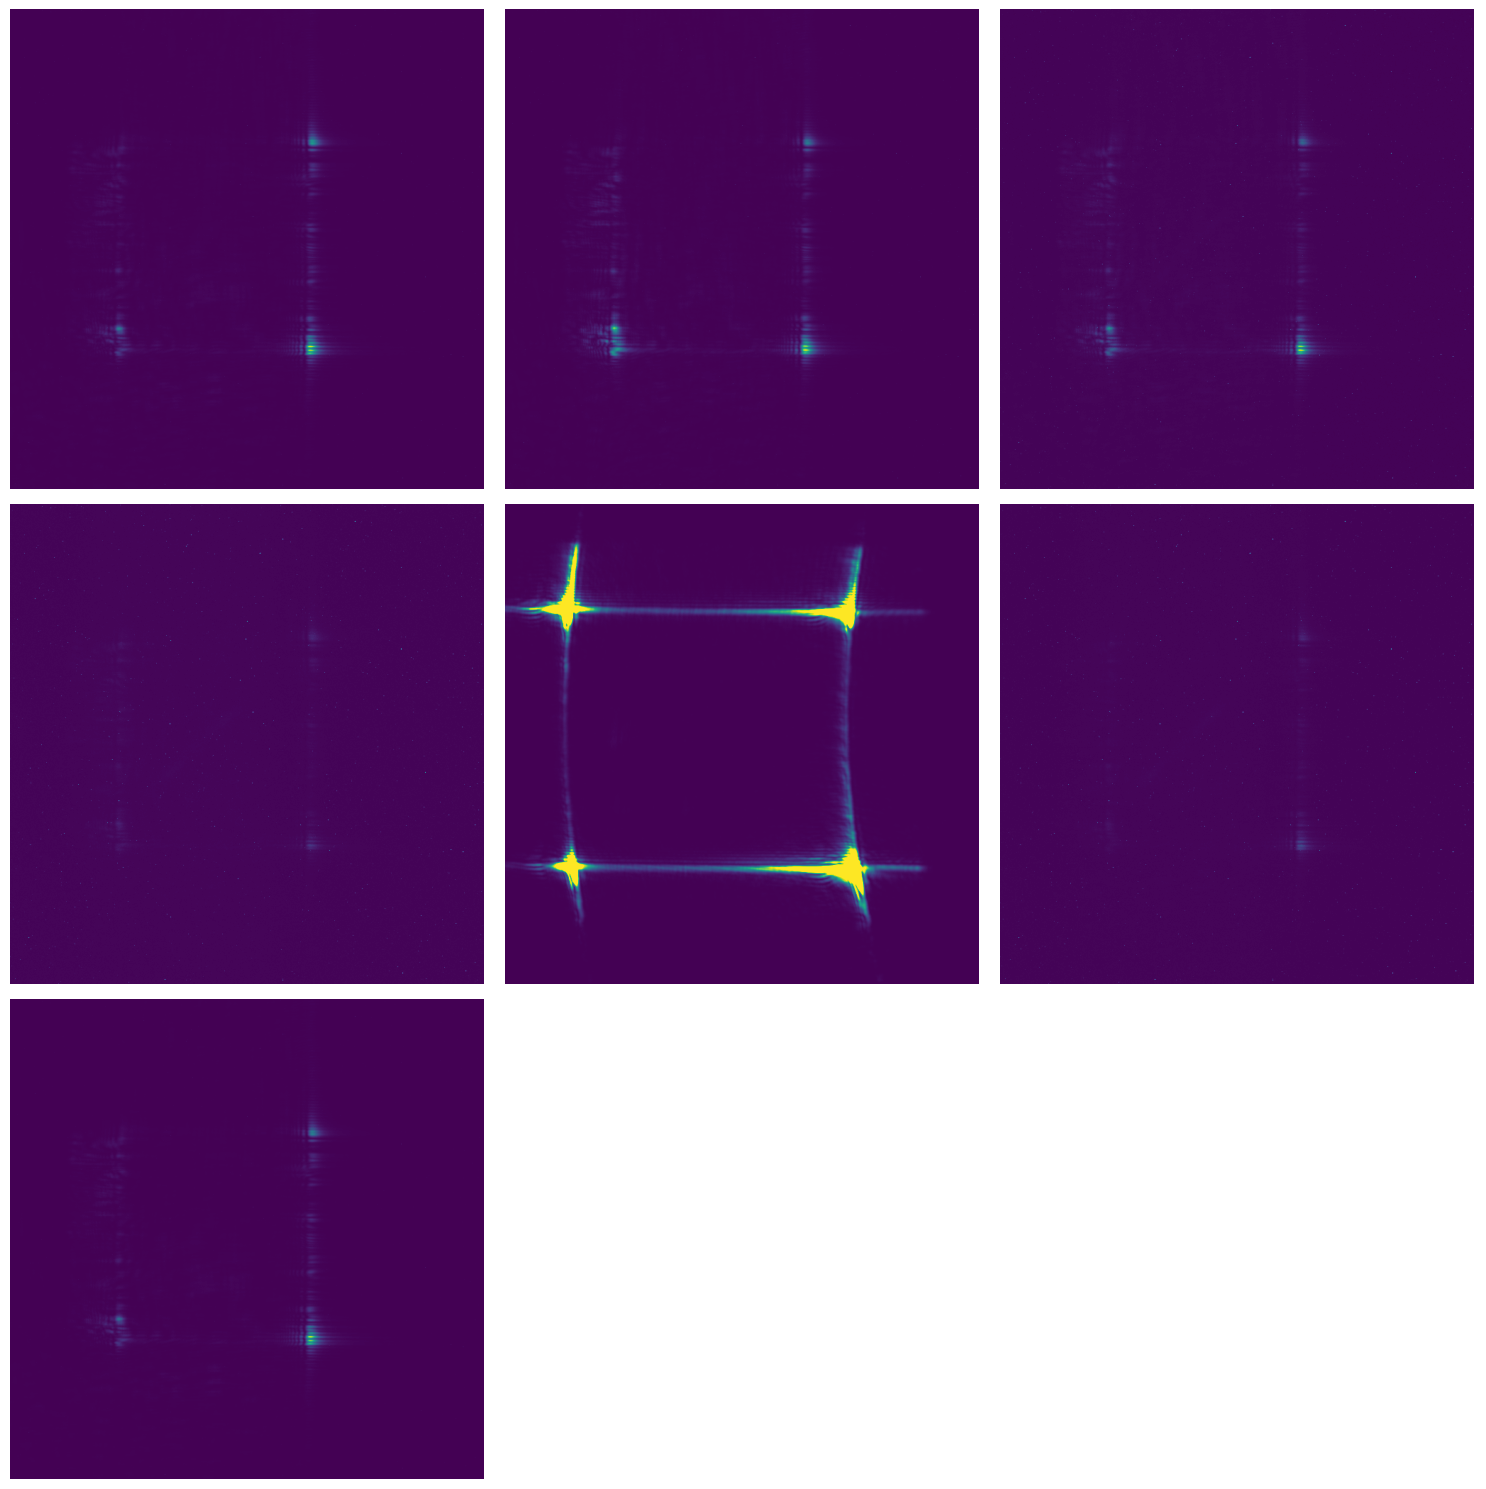

In [10]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".tif"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

def display_images_in_grid(images, cols=3):
    total = len(images)
    rows = math.ceil(total / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 5))
    
    for i, img in enumerate(images):
        ax = axs[i // cols, i % cols]
        ax.imshow(img)
        ax.axis('off')

    # Hide any unused subplots
    for i in range(total, rows * cols):
        axs[i // cols, i % cols].axis('off')

    plt.tight_layout()
    plt.show()

folder_path = 'data'  # Remplacez ceci par le chemin de votre dossier
images = load_images_from_folder(folder_path)
display_images_in_grid(images, cols=3)  # Vous pouvez ajuster le nombre de colonnes si nécessaire


### Noise reduction

In [12]:
import cv2
import numpy as np

def ameliorer_images_microscopie(image_path):
    # Charger l'image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Filtrage médian
    image_mediane = cv2.medianBlur(image, 5)

    # Déconvolution de Wiener (remplacer 'psf' par la fonction de point étalé réelle de votre microscope)
    psf = np.ones((5, 5)) / 25
    image_deconv = cv2.filter2D(image_mediane, -1, psf)

    # Flou gaussien
    image_floue = cv2.GaussianBlur(image_deconv, (5, 5), 0)

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image_clahe = clahe.apply(image_floue)

    # Correction de fond (à personnaliser selon votre besoin)
    fond = cv2.GaussianBlur(image_clahe, (51, 51), 0)
    image_corrigee = cv2.subtract(image_clahe, fond)

    return image_corrigee

# Utilisez la fonction sur votre image
image_amelioree = ameliorer_images_microscopie('data/im1.tif')

# Afficher l'image améliorée
cv2.imshow('Image améliorée', image_amelioree)
cv2.waitKey(0)
cv2.destroyAllWindows()
